<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic)</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer_logo.png" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer.png" width="512">
</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>Les variables sont calculées à partir d'une image numérisée d'une ponction d'aspiration à l'aiguille fine (FNA) utilisée pour obtenir des échantillons à partir de ganglions lymphatique. Elles décrivent les caractéristiques des noyaux cellulaires présents sur l'image.</div>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

In [2]:
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

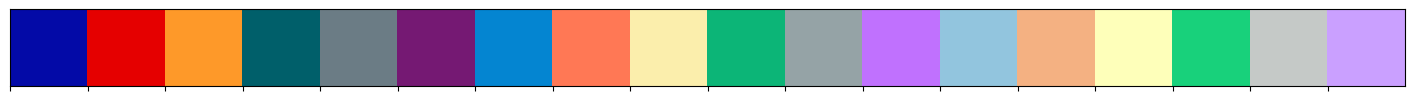

In [4]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee, afficheSeparationsBinaires

In [6]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram,\
                         affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='BreastCancerWisconsin-Classifications')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
        <tr>                                                                                   
             <th style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>data.csv</th>
             <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/breast_cancer_logo.png" width="128"></th>
        </tr>  
<table>   
<table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;"> </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>    
    <tr>
        <th  style="text-align:left"> </th>                            
        <th  style="text-align:left;font-style: italic">ID number</th> 
        <th  style="text-align:left;font-style: italic">index</th>
    </tr>    
    <tr>
        <th  style="text-align:left">0 </th>                            
        <th  style="text-align:left;color:red;font-style: italic">Diagnosis</th> 
        <th  style="text-align:left;color:red;font-style: italic">M = malignant, B = benign</th>
    </tr>    
    <tr>
        <th  style="text-align:left">1 </th>                            
        <th  style="text-align:left">radius </th>                            
        <th  style="text-align:left"></th>
    </tr>    
    <tr>
        <th  style="text-align:left">2 </th>                            
        <th  style="text-align:left">texture </th>                          
        <th  style="text-align:left">standard deviation of gray-scale values</th>
    </tr>    
    <tr>
        <th  style="text-align:left">3 </th>                            
        <th  style="text-align:left">perimeter </th>                         
        <th  style="text-align:left"></th>
    </tr>    
    <tr>
        <th  style="text-align:left">4 </th>                            
        <th  style="text-align:left">area</th>                               
        <th  style="text-align:left"></th>
    </tr> 
    <tr>
        <th  style="text-align:left">5 </th>                            
        <th  style="text-align:left">smoothness </th>                            
        <th  style="text-align:left">local variation in radius lengths</th>
    </tr>  
    <tr>
        <th  style="text-align:left">6 </th>                            
        <th  style="text-align:left">compactness </th>                      
        <th  style="text-align:left">$\frac{perimeter^2}{area - 1.0}$</th>
    </tr>    
    <tr>
        <th  style="text-align:left">7 </th>                            
        <th  style="text-align:left">concavity </th>              
        <th  style="text-align:left">severity of concave portions of the contour</th>
    </tr>  
    <tr>
        <th  style="text-align:left">8 </th>                            
        <th  style="text-align:left">concave points </th>                            
        <th  style="text-align:left">number of concave portions of the contour</th>
    </tr>   
    <tr>
        <th  style="text-align:left">9 </th>                            
        <th  style="text-align:left">symmetry </th>                           
        <th  style="text-align:left"></th>
    </tr> 
    <tr>
        <th  style="text-align:left">10 </th>                            
        <th  style="text-align:left">fractal dimension </th>                 
        <th  style="text-align:left">"coastline approximation" - 1</th>
    </tr>    
</table>

<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>La moyenne, l’écart type et la « pire valeur » ou la plus grande (moyenne des trois valeurs les plus grandes) de ces variables ont été calculées pour chaque image, ce qui a donné lieu à 30 variables.</div>

In [9]:


donnees = pd.read_csv('../donnees/Breast Cancer Wisconsin/data.csv', index_col=['id','diagnosis']).drop(columns='Unnamed: 32')
donnees.sort_index(axis=1, inplace=True)
dictDiagnosis,dictRDiagnosis,dictLabels = {'M':1,'B':0},{1:'M',0:'B'},{1:'malignant',0:'benign'}

cible = 'diagnosis'

In [10]:
donnees.sample(5)

,,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,diagnosis,,,,,,,,,,,,,,,,,,,,,
924632,B,514.3,16.83,595.7,0.05824,0.021530,0.16200,0.02343,0.007620,0.06493,0.061950,...,13.89,0.08123,0.008412,0.1227,0.1566,0.01695,0.2372,28.92,1.3600,35.74
861103,B,401.5,24.62,525.1,0.09362,0.017060,0.16760,0.02233,0.007506,0.06127,0.045910,...,13.11,0.11020,0.010370,0.1557,0.1842,0.01816,0.2762,20.97,2.1740,32.16
8911834,B,587.4,19.41,670.0,0.07688,0.015410,0.17240,0.03711,0.010430,0.09993,0.044790,...,14.98,0.09516,0.004235,0.1185,0.2110,0.01528,0.2955,15.18,0.9195,21.74
84458202,M,577.9,50.96,897.0,0.16450,0.030290,0.36820,0.05985,0.014480,0.15560,0.093660,...,17.06,0.11890,0.008805,0.1654,0.2196,0.01486,0.3196,20.83,1.3770,28.14
873586,B,508.8,21.79,570.7,0.03774,0.006364,0.05445,0.01330,0.007408,0.03990,0.009193,...,13.63,0.08739,0.008534,0.1162,0.1466,0.01065,0.1783,13.06,0.9899,16.15


>> <div style='padding:15px;color:#030aa7;background-color:#d8dcd6;font-size:120%;text-align: left;font-family: Georgia, serif'>Il n'y a pas de valeurs non renseignées</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

In [11]:
X = donnees.copy()
y = donnees.reset_index()[cible].apply(lambda x: dictDiagnosis[x])
y.index = X.index

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'
donnees.reset_index(inplace=True)
donnees.set_index(['échantillon','id','diagnosis'],inplace=True)
donnees.to_parquet(os.path.join(projet.repertoireDonnees,'donnees_echantillons.parquet'))

In [13]:
X = donnees.copy()
y = donnees.reset_index()[cible].apply(lambda x: dictDiagnosis[x])
y.index = X.index

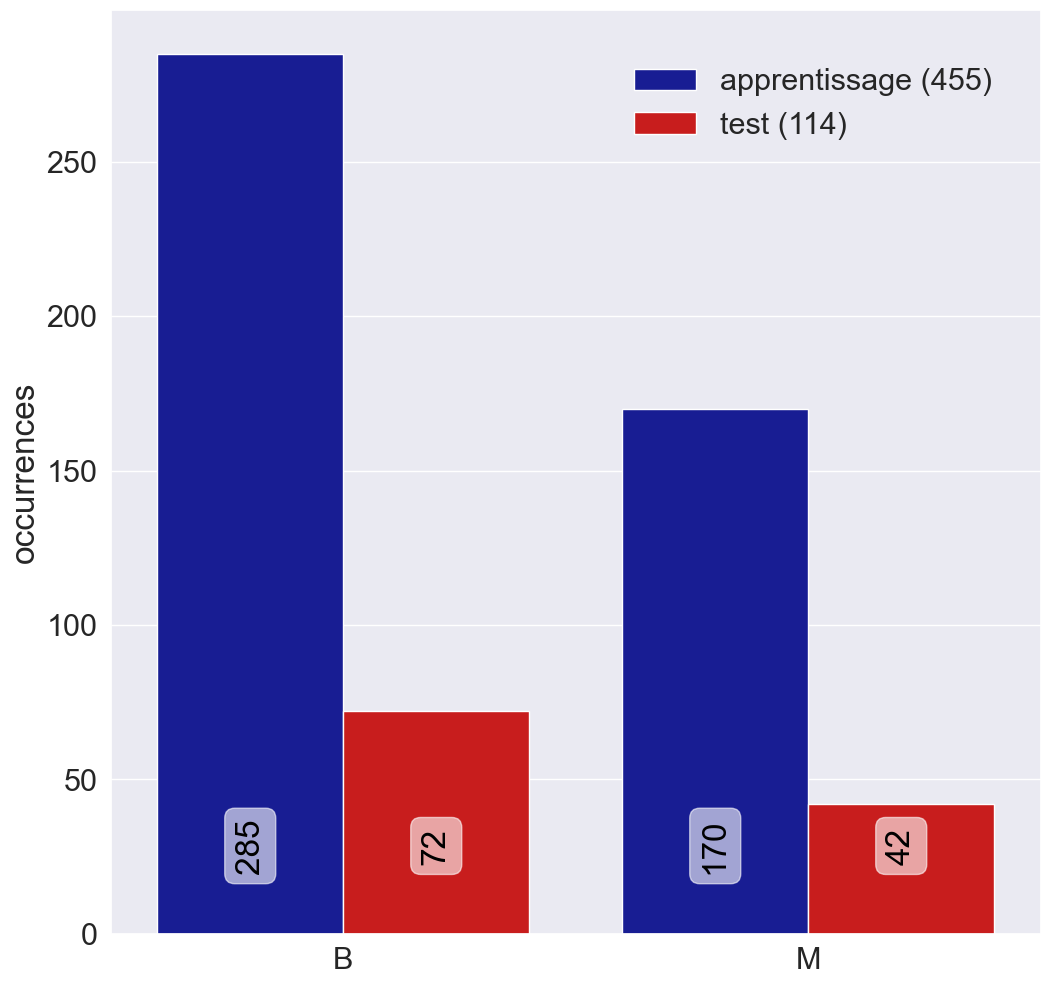

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)

In [15]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classificateurs </div></b>

In [16]:
classificateursDict =  initDictionnaireClassificateurs(arbres=12)
classificateursDict.pop('LightGBM')
classificateursDict.pop('XGBoost')
# classificateursDict.pop('Stochastic_GD')

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
classificateursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=12, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=12),
 'LogisticRegression': LogisticRegression(C=0.81113, max_iter=3000, n_jobs=-1),
 'Stochastic_GD': SGDClassifier(alpha=0.01, loss='log_loss', max_iter=200),
 'Gaussian_Process': GaussianProcessClassifier(n_jobs=-1),
 'Nearest_Neighbors': KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=17, p=1,
                      weights='distance'),
 'Linear_SVM': SVC(C=10, kernel='linear', probability=True),
 'Radial_NuSVM': NuSVC(gamma=0.5, nu=0.195, probability=True),
 'Poly_NuSVM': NuSVC(kernel='poly', nu=0.1, probability=True),
 'GaussianNaiveBayes': GaussianNB(),
 'QuadraticDiscriminant': QuadraticDiscriminantAnalysis(),
 'Neural_Net': MLPClassifier(alpha=1)}

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

AdaBoost               0.9386	--	Area under the ROC curve : 0.9851	--	Exécution  :.03s
GaussianNaiveBayes     0.9211	--	Area under the ROC curve : 0.9835	--	Exécution  :.01s
Gaussian_Process       0.7105	--	Area under the ROC curve : 0.5417	--	Exécution  :.06s
Linear_SVM             0.9737	--	Area under the ROC curve : 0.9960	--	Exécution  :6.59s
LogisticRegression     0.9561	--	Area under the ROC curve : 0.9937	--	Exécution  :1.40s
Nearest_Neighbors      0.9474	--	Area under the ROC curve : 0.9780	--	Exécution  :.08s
Neural_Net             0.9474	--	Area under the ROC curve : 0.9818	--	Exécution  :.16s
Poly_NuSVM             0.6667	--	Area under the ROC curve : 0.8075	--	Exécution  :.04s
QuadraticDiscriminant  0.9561	--	Area under the ROC curve : 0.9850	--	Exécution  :.02s
Radial_NuSVM           0.6316	--	Area under the ROC curve : 0.4514	--	Exécution  :.07s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9760	--	Exécution  :.11s
Stochastic_GD          0.8772	--	Area und

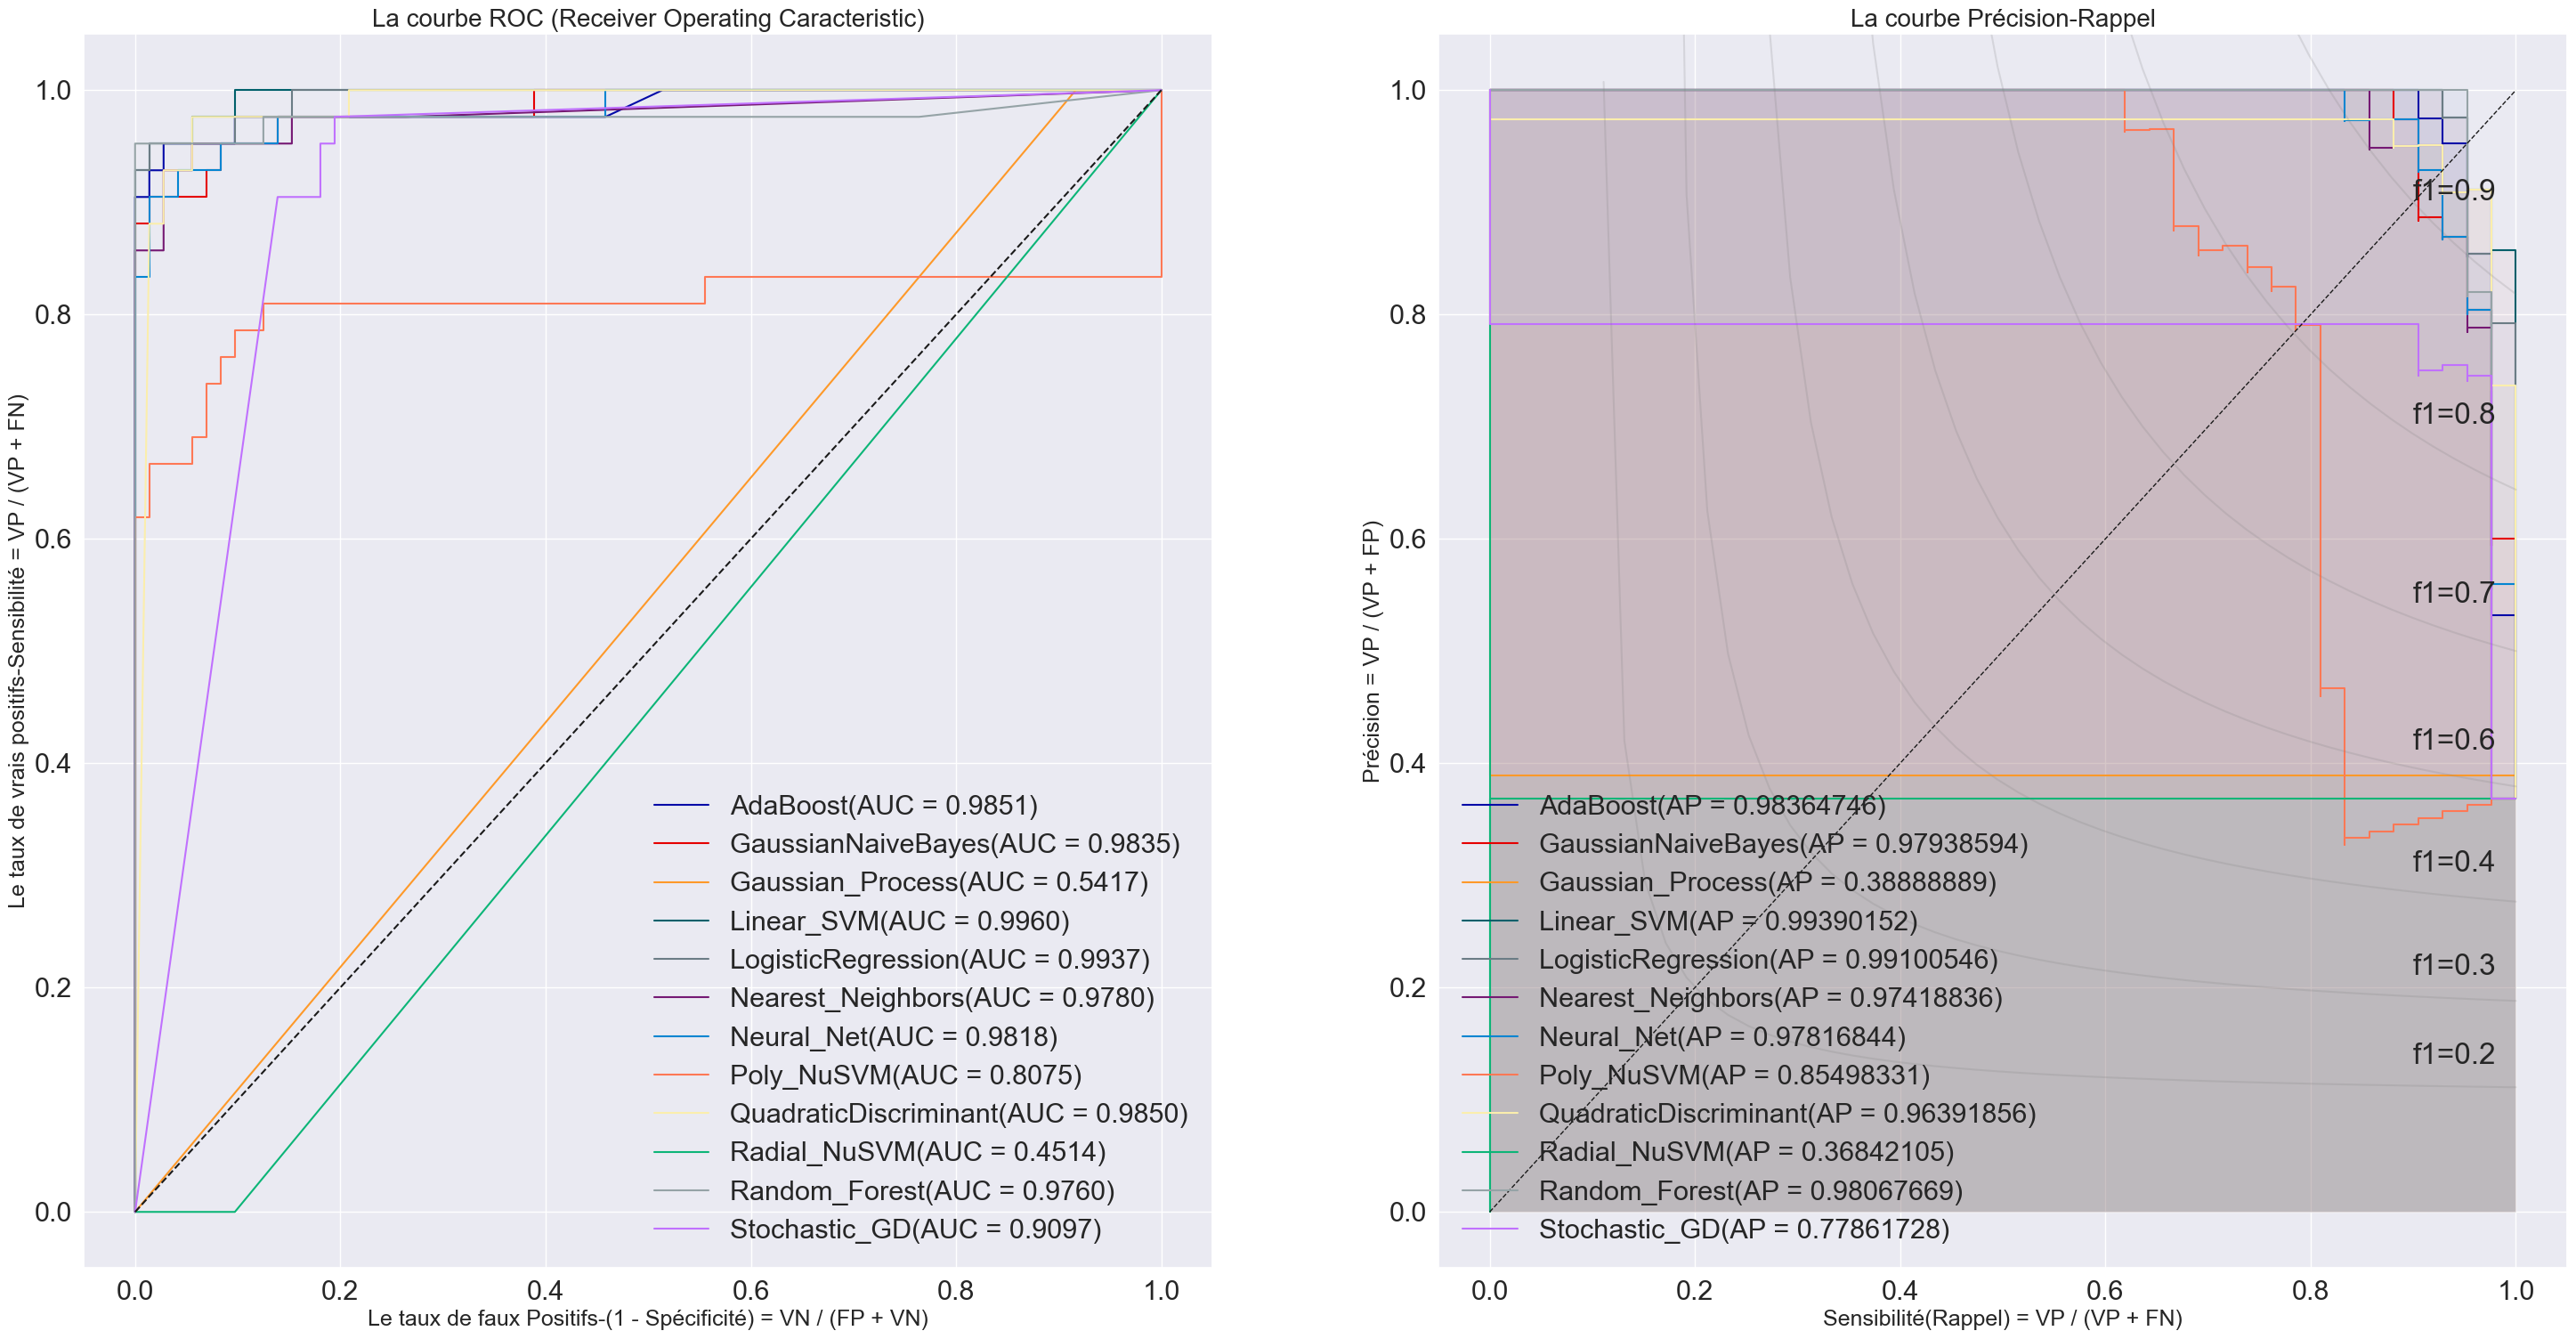

Exécution  :9.61s


In [18]:
resultats = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette[:len(classificateursDict.keys())],
                                                     nom_essai = 'Initial', 
                                                     projet=projet)

In [19]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(16)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
Linear_SVM,0.996032,0.993902,0.973684,0.963855,0.975610,0.952381,0.986111,0.948517,0.026316,0.930233,Initial
LogisticRegression,0.993717,0.991005,0.956140,0.941176,0.930233,0.952381,0.958333,1.580862,0.043860,0.888889,Initial
AdaBoost,0.985119,0.983647,0.938596,0.919540,0.888889,0.952381,0.930556,2.213207,0.061404,0.851064,Initial
QuadraticDiscriminant,0.984954,0.963919,0.956140,0.942529,0.911111,0.976190,0.944444,1.580862,0.043860,0.891304,Initial
GaussianNaiveBayes,0.983466,0.979386,0.921053,0.894118,0.883721,0.904762,0.930556,2.845552,0.078947,0.808511,Initial
Neural_Net,0.981812,0.978168,0.947368,0.926829,0.950000,0.904762,0.972222,1.897034,0.052632,0.863636,Initial
Nearest_Neighbors,0.978009,0.974188,0.947368,0.926829,0.950000,0.904762,0.972222,1.897034,0.052632,0.863636,Initial
Random_Forest,0.976025,0.980677,0.947368,0.930233,0.909091,0.952381,0.944444,1.897034,0.052632,0.869565,Initial
Stochastic_GD,0.909722,0.778617,0.877193,0.844444,0.791667,0.904762,0.861111,4.426414,0.122807,0.730769,Initial


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Choix simple de variables WORST</div></b> 

AdaBoost               0.9474	--	Area under the ROC curve : 0.9906	--	Exécution  :.03s
GaussianNaiveBayes     0.9298	--	Area under the ROC curve : 0.9848	--	Exécution  :.01s
Gaussian_Process       0.8860	--	Area under the ROC curve : 0.8816	--	Exécution  :.05s
Linear_SVM             0.9737	--	Area under the ROC curve : 0.9970	--	Exécution  :6.75s
LogisticRegression     0.9737	--	Area under the ROC curve : 0.9947	--	Exécution  :.79s
Nearest_Neighbors      0.9649	--	Area under the ROC curve : 0.9797	--	Exécution  :.07s
Neural_Net             0.9386	--	Area under the ROC curve : 0.9884	--	Exécution  :.14s
Poly_NuSVM             0.3246	--	Area under the ROC curve : 0.1237	--	Exécution  :.02s
QuadraticDiscriminant  0.9474	--	Area under the ROC curve : 0.9833	--	Exécution  :.01s
Radial_NuSVM           0.6316	--	Area under the ROC curve : 0.8884	--	Exécution  :.06s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9787	--	Exécution  :.11s
Stochastic_GD          0.9211	--	Area unde

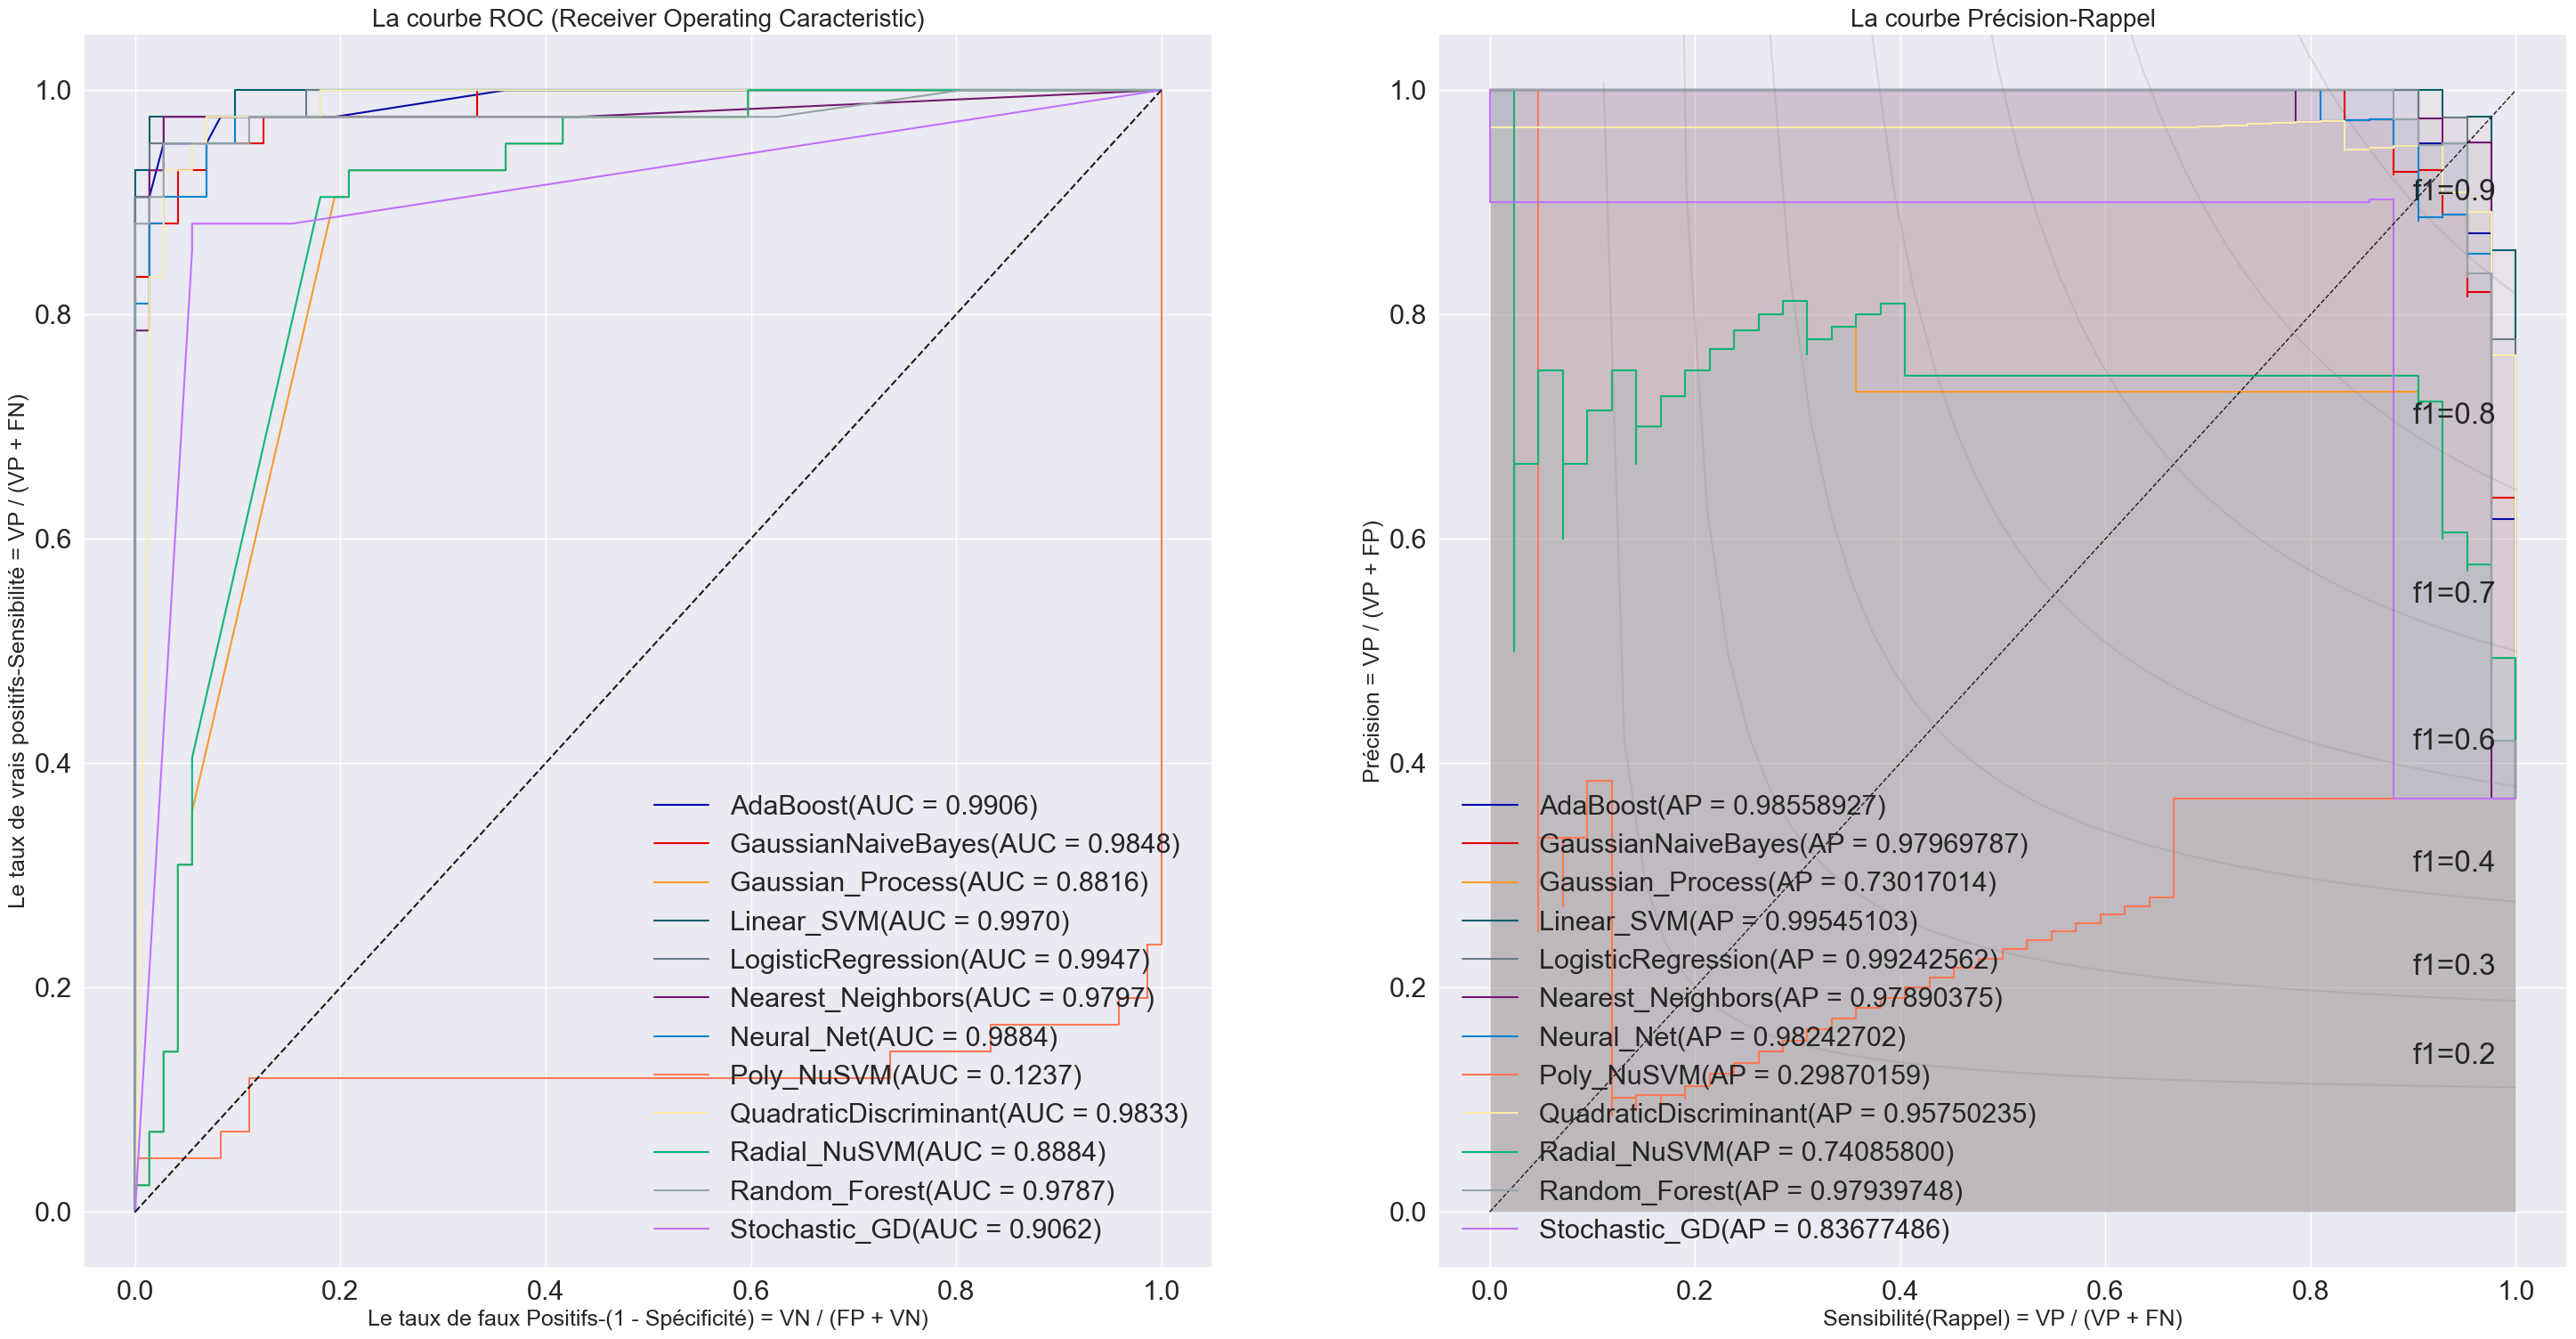

Exécution  :8.97s


In [20]:
resultatsTemp = executionEssaiComparaisonClassificateurs( classificateursDict=classificateursDict, 
                                                        X_train=X_train.filter(regex='(worst)$', axis=1), 
                                                        y_train=y_train,
                                                        X_test=X_test.filter(regex='(worst)$', axis=1), 
                                                        y_test=y_test, 
                                                        couleurs=palette[:len(classificateursDict.keys())],
                                                        nom_essai='ChoixVarW', 
                                                        projet=projet)

In [21]:
resultats = pd.concat([resultats,resultatsTemp])

In [22]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(10)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
Linear_SVM,0.997024,0.995451,0.973684,0.963855,0.975610,0.952381,0.986111,0.948517,0.026316,0.930233,ChoixVarW
Linear_SVM,0.996032,0.993902,0.973684,0.963855,0.975610,0.952381,0.986111,0.948517,0.026316,0.930233,Initial
LogisticRegression,0.994709,0.992426,0.973684,0.964706,0.953488,0.976190,0.972222,0.948517,0.026316,0.931818,ChoixVarW
LogisticRegression,0.993717,0.991005,0.956140,0.941176,0.930233,0.952381,0.958333,1.580862,0.043860,0.888889,Initial
AdaBoost,0.990575,0.985589,0.947368,0.930233,0.909091,0.952381,0.944444,1.897034,0.052632,0.869565,ChoixVarW
Neural_Net,0.988426,0.982427,0.938596,0.915663,0.926829,0.904762,0.958333,2.213207,0.061404,0.844444,ChoixVarW
AdaBoost,0.985119,0.983647,0.938596,0.919540,0.888889,0.952381,0.930556,2.213207,0.061404,0.851064,Initial
QuadraticDiscriminant,0.984954,0.963919,0.956140,0.942529,0.911111,0.976190,0.944444,1.580862,0.043860,0.891304,Initial
GaussianNaiveBayes,0.984788,0.979698,0.929825,0.906977,0.886364,0.928571,0.930556,2.529379,0.070175,0.829787,ChoixVarW


# Données centré réduit (Standrad Scaler)

In [23]:
X_train, X_test = X.loc[('apprentissage'),:],\
X.loc[('test'),:]

In [24]:

from sklearn.preprocessing import StandardScaler
modelStd = StandardScaler()
modelStd.fit(X_train)
X_train[X_train.columns] = modelStd.transform(X_train)
X_test[X_test.columns] = modelStd.transform(X_test)

AdaBoost               0.9386	--	Area under the ROC curve : 0.9851	--	Exécution  :.04s
GaussianNaiveBayes     0.9035	--	Area under the ROC curve : 0.9792	--	Exécution  :.01s
Gaussian_Process       0.9386	--	Area under the ROC curve : 0.9458	--	Exécution  :.05s
Linear_SVM             0.9649	--	Area under the ROC curve : 0.9907	--	Exécution  :.02s
LogisticRegression     0.9737	--	Area under the ROC curve : 0.9931	--	Exécution  :.78s
Nearest_Neighbors      0.9386	--	Area under the ROC curve : 0.9868	--	Exécution  :.08s
Neural_Net             0.9649	--	Area under the ROC curve : 0.9931	--	Exécution  :.21s
Poly_NuSVM             0.9825	--	Area under the ROC curve : 0.9960	--	Exécution  :.02s
QuadraticDiscriminant  0.9561	--	Area under the ROC curve : 0.9850	--	Exécution  :.01s
Radial_NuSVM           0.8246	--	Area under the ROC curve : 0.9425	--	Exécution  :.04s
Random_Forest          0.9474	--	Area under the ROC curve : 0.9772	--	Exécution  :.07s
Stochastic_GD          0.9737	--	Area under

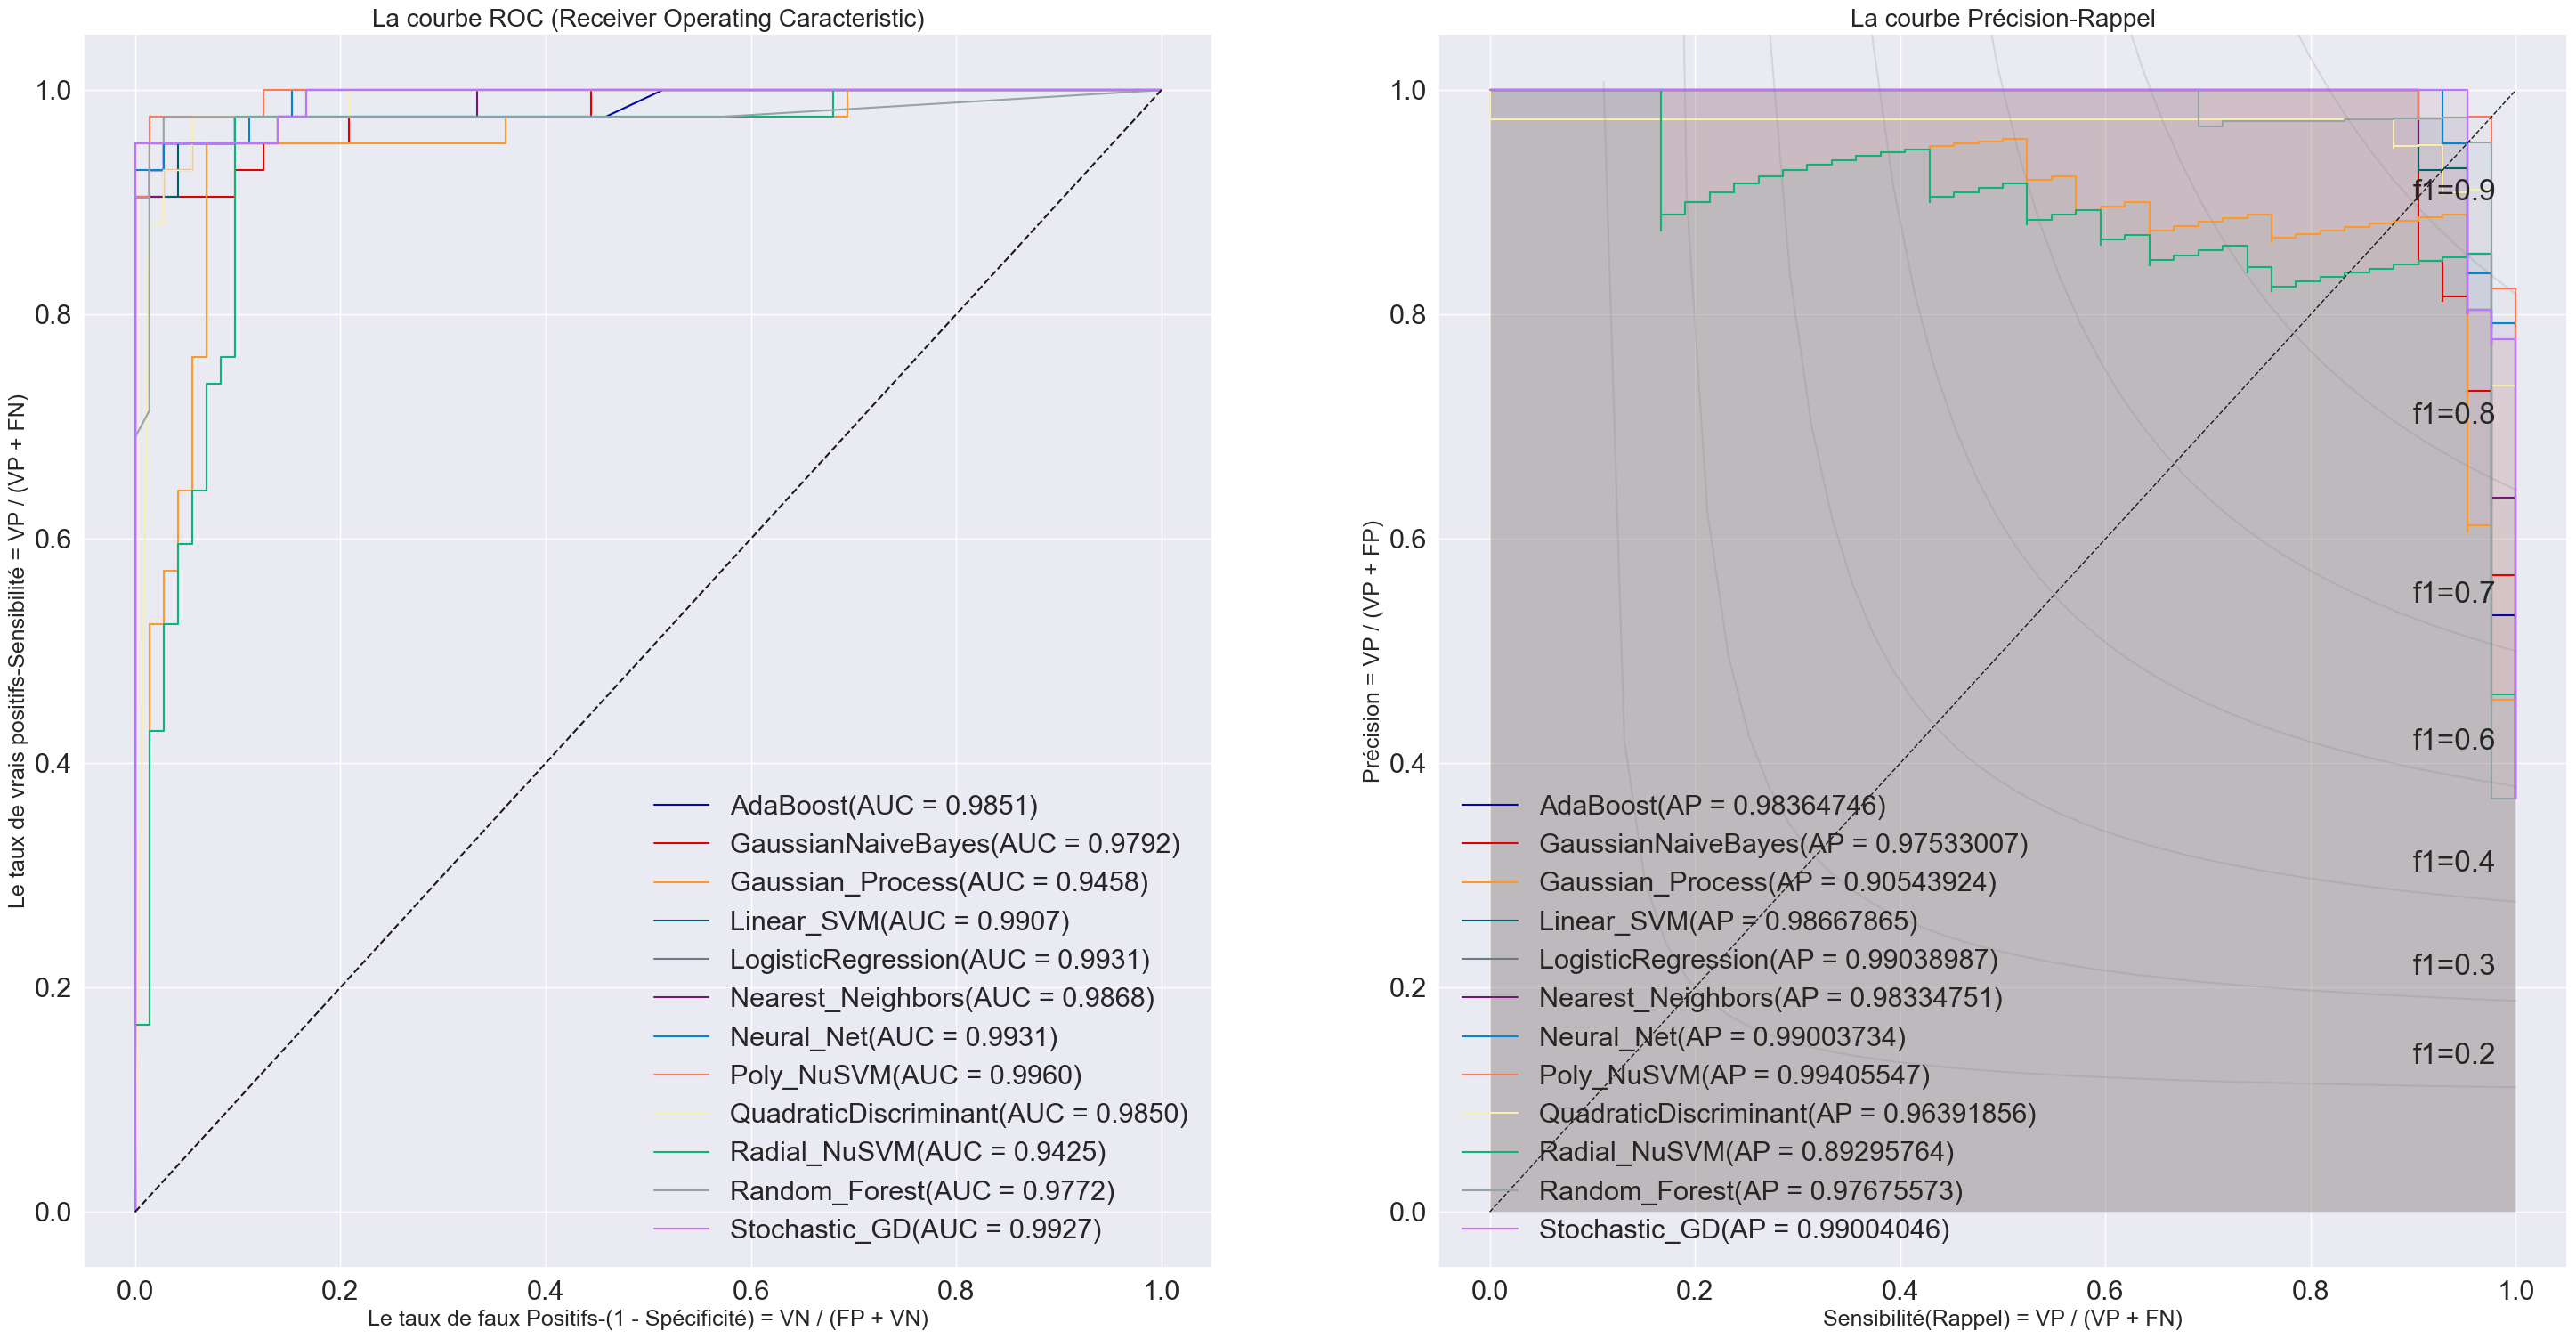

Exécution  :2.26s


In [25]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'StandardScaler01', 
                                                     projet=projet)
resultats = pd.concat([resultats,resultatsTemp])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b> 

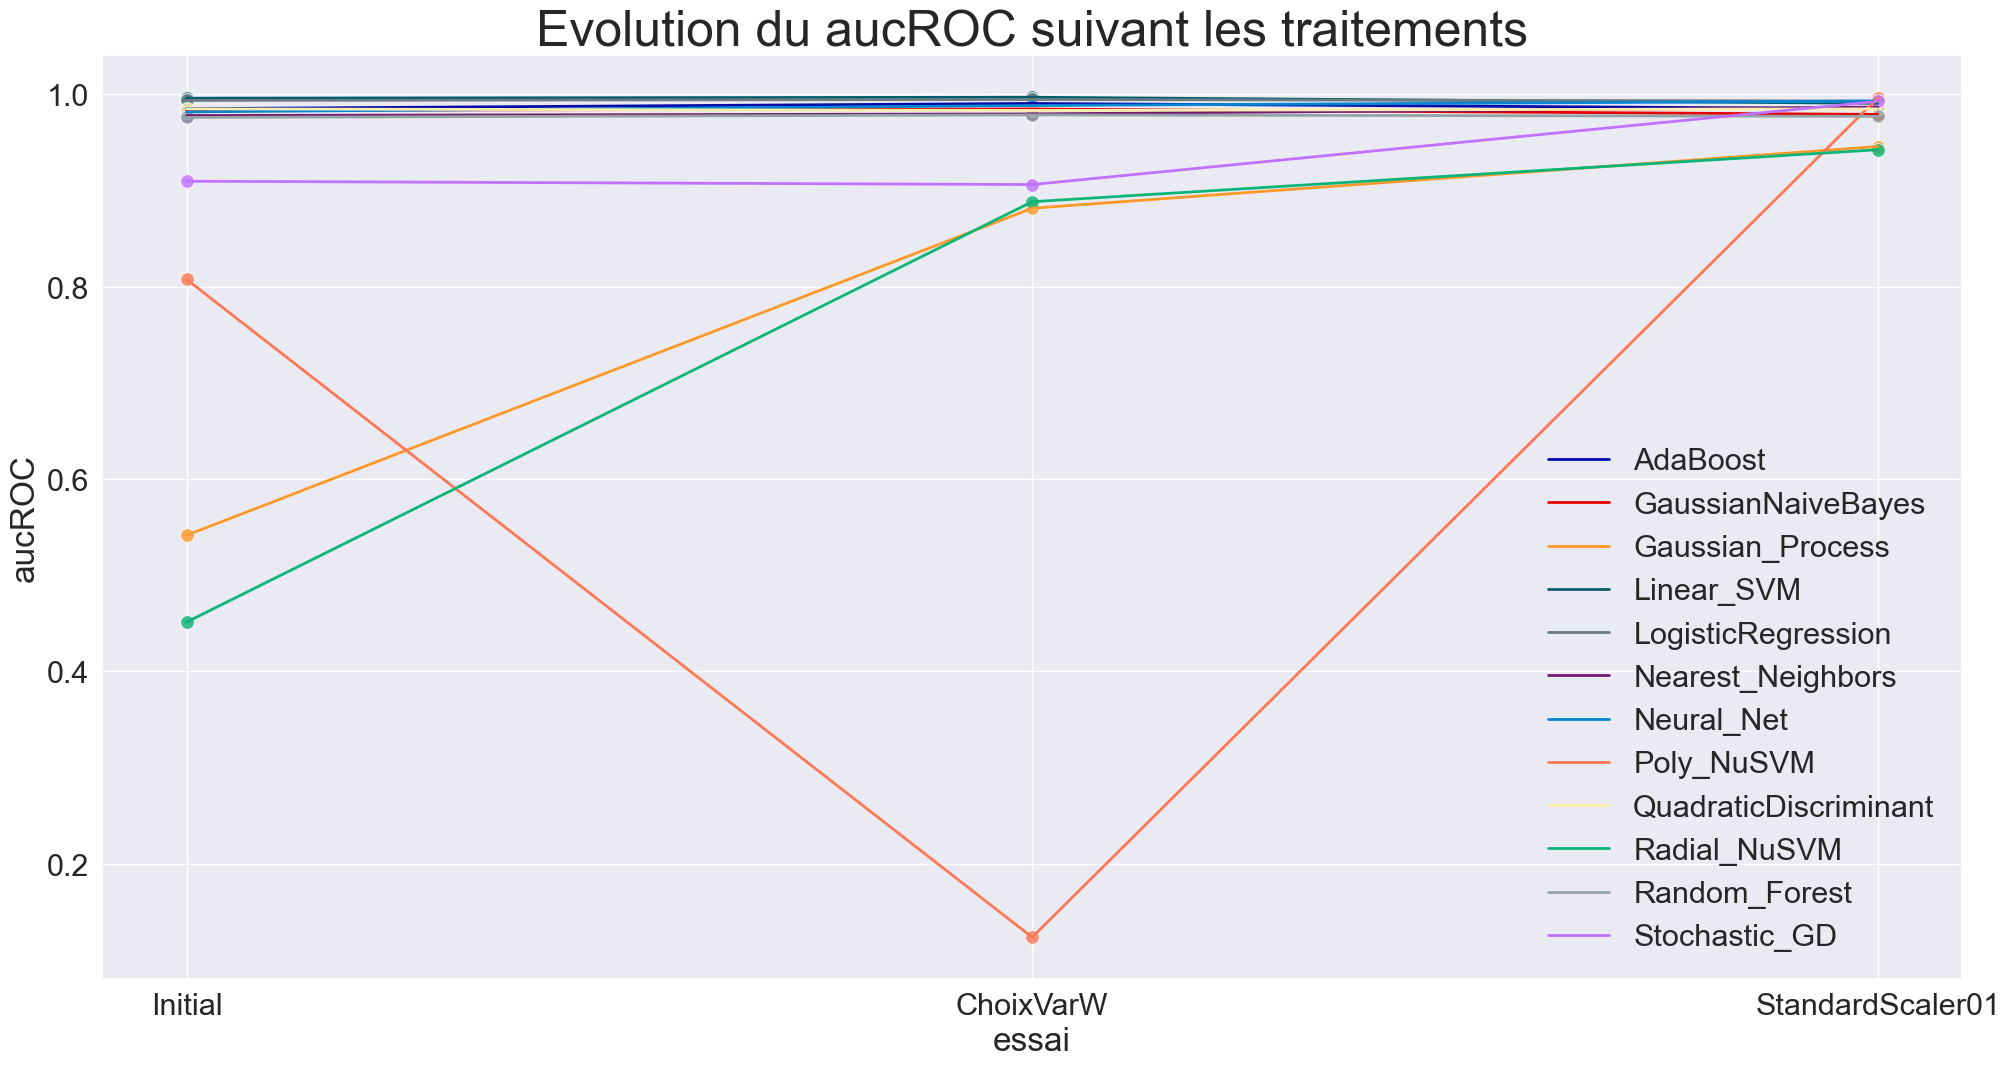

In [26]:
affichageEvolutionMetriques(resultats, metrique='aucROC', palette=palette)